# Predicting Diabetes

### Import libraries

In [2]:
import pandas as pd               #panda is a data frame library
import matplotlib.pyplot as plt   #mathplotlib.pyplot plots data
import numpy as np                #numpy provides N-dim object support

#do ploting inline instead of in a seperate window
%matplotlib inline

In [3]:
df = pd.read_csv("./data/pima-data.csv")  # load pima data. Adjust path as necessary

In [4]:
df.shape # shows in (rows, columns)

(768, 10)

In [5]:
df.head(5) # shows first 5 rows

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5) # end of the data frame

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features
From the metadata on the data source we have the following definition of the features.

|Feature	|Description	|Comments|
|-----------|---------------|--------|
|num_preg	|number of pregnancies|
|glucose_conc	|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|diastolic_bp	|Diastolic blood pressure (mm Hg)|
|thickness	|Triceps skin fold thickness (mm)|
|insulin	|2-Hour serum insulin (mu U/ml)|
|bmi	|Body mass index (weight in kg/(height in m)^2)|
|diab_pred	|Diabetes pedigree function|
|Age (years)	|Age (years)|
|skin	|????	|What is this?|
|diabetes	|Class variable (1=True, 0=False)	|Why is our data boolean (True/False)?|

### Check for null values

In [7]:
df.isnull().values.any()

False

### Check correlation and if there is any then delete the correlation

In [8]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix of each pair of columns in the dataframe.
    
    Input:
        df: pandas Data Frame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                                0------------------------->1
                                                Expect a darkred line top left to bottom right
    """
    
    corr = df.corr() # data frame correlation function
    fig , ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)

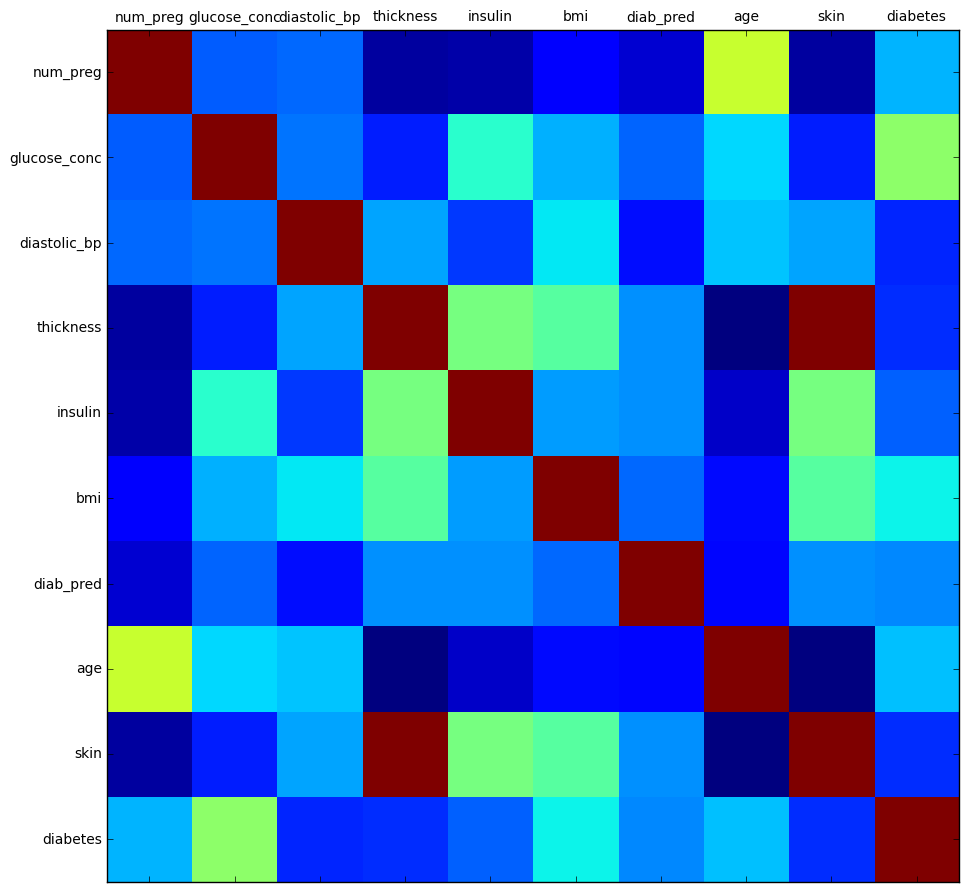

In [9]:
plot_corr(df)

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
del df['skin']  # delete the skin column b/c skin and thickness have a strong correlation

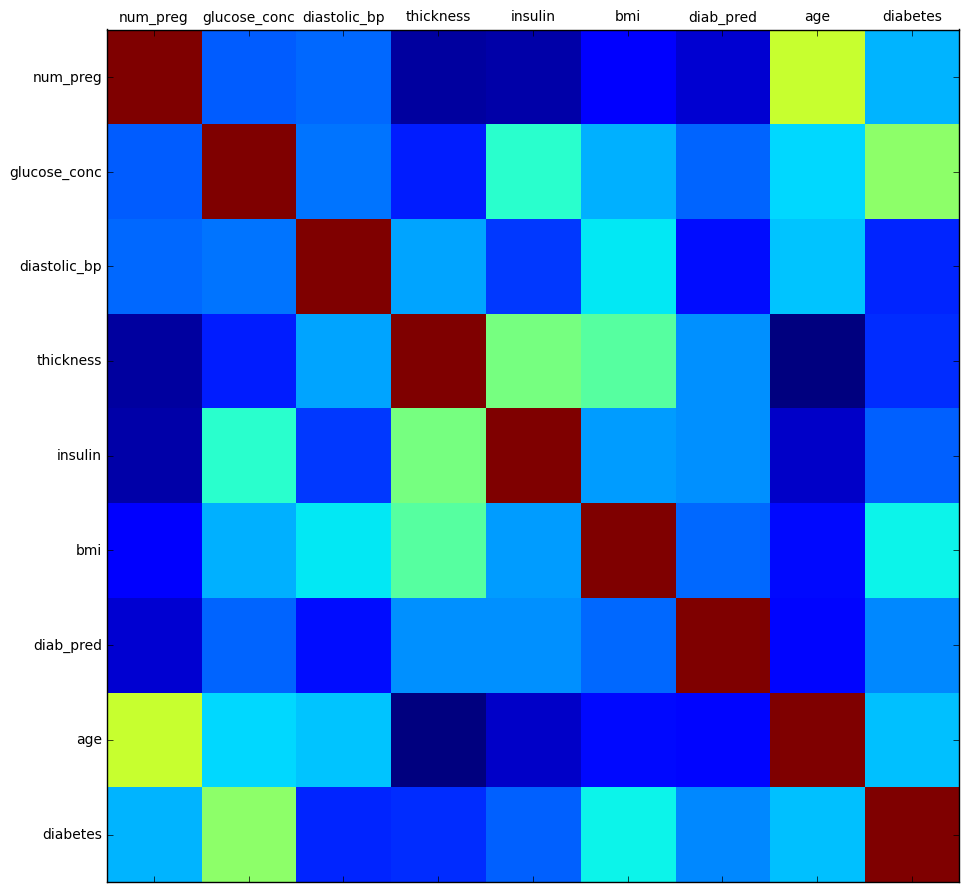

In [12]:
plot_corr(df)

### Check Data types (Make every column numeric)

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1 and False to 0

In [14]:
diabetes_map = {True: 1, False: 0} # create dictionary

In [15]:
df['diabetes'] = df['diabetes'].map(diabetes_map) # uses pandas map function for molding data (true=1, false=0)

In [16]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check True/False ratio

In [17]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true+num_false)) * 100))
print("Number of false cases: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true+num_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


# Training the Model

### Splitting the data
70% for training, 30% for testing

In [18]:
from sklearn.model_selection import train_test_split #model_selection is a new way to split the data

In [19]:
feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values # predictor feature columns (8 x m)
Y = df[predicted_class_names].values # predicated class (1=true, 0=false) column (1 x m)
split_test_size = 0.30

# random_state(could be any number) gurantess the split is always goint to be same when it splits the data again
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = split_test_size, random_state=42)  

We check to ensure we have the desired 70% train, 30% test split of the data

In [20]:
print("{0:0.2f}% in training set".format((len(X_train) / len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index)) * 100))

69.92% in training set
30.08% in test set


### Verifying predicted value was split correctly 

In [21]:
print("Original True: {0} ({1:2.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1]) / len(df.index)) * 100))
print("Original False: {0} ({1:2.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0]) / len(df.index)) * 100))

print("Training True: {0} ({1:2.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1]) / len(Y_train)) * 100))
print("Training False: {0} ({1:2.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0]) / len(Y_train)) * 100))

print("Test True: {0} ({1:2.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1]) / len(Y_test)) * 100))
print("Test False: {0} ({1:2.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0]) / len(Y_test)) * 100))

Original True: 268 (34.90%)
Original False: 500 (65.10%)
Training True: 188 (35.01%)
Training False: 349 (64.99%)
Test True: 80 (34.63%)
Test False: 151 (65.37%)


## Post-split Data Preperation

### Hidden missing values

In [22]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?

How many rows have unexpected 0 values?

In [23]:
print("# rows in datafram {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in datafram 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


*We usually need a domain expert to fix missing values!!!*

#### Missing Data
    Common Problem
    Optioins
        - Ignore
        - Drop observations (rows)
        - Replace values (Impute)
    Data Numbers
        - 768 rows
        - 374 missing insuling values
        - Can we ignore/delete almost 50% of data?    

#### Imputing Options
    - Replace with mean, median
    - Replace with expert knowledge derived value (This is a BETTER option)

#### Impute with the MEAN ( Average)

In [24]:
from sklearn.preprocessing import Imputer

# Impute with the mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0) # axis=0 which is column

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

### Training Initial Algorithm - Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, Y_train.ravel()) # Y_train.ravel() convert 2d to 1d array

GaussianNB(priors=None)

#### Performance on Training Data

In [29]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, nb_predict_train)))

Accuracy: 0.7542


#### Performance on Test Data

In [31]:
# predict values using the test data
nb_predict_test = nb_model.predict(X_test)

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test)))

Accuracy: 0.7359


#### Metrics 

In [39]:
print("Confusion Matrix")
print("Test data size: {0}".format(len(Y_test)))
# Note the use of labels for set 1 = True to Upper left and 0 = False to lower rigth
print("{0}".format(metrics.confusion_matrix(Y_test, nb_predict_test, labels=[1,0])))

Confusion Matrix
Test data size: 231
[[ 52  28]
 [ 33 118]]


For confusion matrix
    - left column is predicted TRUE
    - right column is predicted FALSE
    - rows are actual values 
        - the top row is actual TRUE
        - the bottom row is actual FALSE

    [[TP, FP]
     [FN, TN]]
     - TP(true, positive): *actual diabetes, and predicted to be diabetes
     - FP(false, positive): actual not diabetes, and predicted to be diabetes
     - FN(false, negative): actual diabetes, and predicted to be not diabetes  
     - TN(true, negative): *actual not diabetes, and predicted to be not diabetes

##### Perfect Classifier
    [[80,0]
     [0,151]]
As I can see, my classifier is far from perfect

In [38]:
print("\nClassification Report")
print(metrics.classification_report(Y_test, nb_predict_test, labels=[1,0]))


Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



|Column Names| Description|Comment|
|------------|------------|-------|
|recall | class one or diabetes| True Positive rate and sensitivity. It is how well the model is predicting diabetes.Mathematically Recall = TP/ (TP+FN)|
|precision| positive predictor value|This is how often the patient actually had diabetes. Mathematically Precision = TP/(TP+FP). We need to increase this value that would means a fewer false positives|

## Performance Improvement Options
    - Adjust current algorithms (hyperparameters, Unfotunatly, Naive Bayes has no hyperparameters)
    - Get more data or improve data (We dont have more data)
    - Improve training
    - Switch Algorithms
   

### Random Forest (Switch Algorithms) 

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)   # Create random forest object
rf_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

#### Predict Training Data

In [51]:
rf_predict_train = rf_model.predict(X_train)

# training metrics
print("Accuracy score: {0:.4f}".format(metrics.accuracy_score(Y_train, rf_predict_train)))

Accuracy score: 0.9870


####  Predict Test Data

In [50]:
rf_predict_test = rf_model.predict(X_test)

# test metrics
print("Accuracy score: {0:.4f}".format(metrics.accuracy_score(Y_test,rf_predict_test)))

Accuracy score: 0.7100


In [55]:
print("Confussion Matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test, labels=[1,0])))
print("\nClassification Report")
print("{0}".format(metrics.classification_report(Y_test, rf_predict_test, labels=[1,0])))

Confussion Matrix
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



Whenever I see the difference this BIG (98% - 71%), I am seeing a classic sign of an algorithm that is overfitting the training data. That is model has learnt the training data too WELL.

#### Fixing the overfitting

    - Regularization hyperparameter gives developers ability to control the precision of the algorithm 
    - Cross Validation
    
    The both of these methods can be used at the same time
    
    - Bias - variance trade-off

#### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, Y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# test metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)))
print(metrics.confusion_matrix(Y_test, lr_predict_test, labels=[1,0]))
print("Classification Report")
print(metrics.classification_report(Y_test, lr_predict_test, labels=[1,0]))

Accuracy: 0.7446
[[ 44  36]
 [ 23 128]]
Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



Setting Regularization Parameter

1st max value of 0.613 occured at 1.400


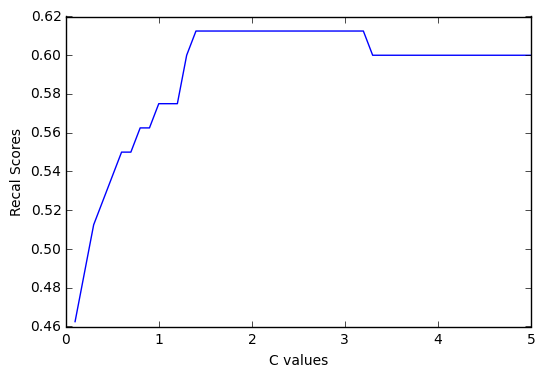

In [76]:
# C values is a Regularization Parameter
C_start = 0.1
C_end = 5.0
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, Y_train.ravel())                  # training the algorithm
    lr_predict_test_loop = lr_model_loop.predict(X_test)         # predicting agains test data
    recall_score = metrics.recall_score(Y_test, lr_predict_test_loop)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_test_loop
    
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at {1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C values")
plt.ylabel("Recal Scores")

!!!We have more non-diabetes results than diabetes results. Perhaps this imbalance is causing an issue. 

#### Unbalanced Classes
More of one class the the others
Our Data 65% no diabetes, 35% diabetes 
###### Can be causing biases estimation yieding poor prediction results

#### Logistic regression with class_weight = "balanced"

1st max value of 0.738 occured at 0.300


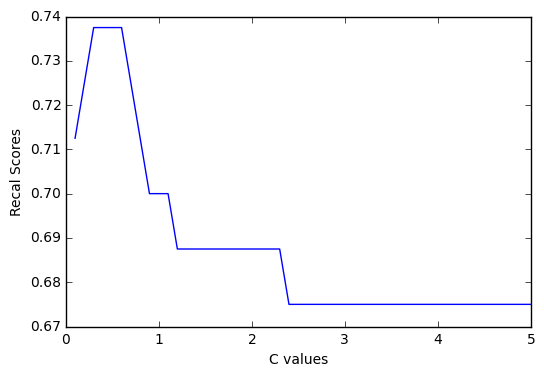

In [77]:
# C values is a Regularization Parameter
C_start = 0.1
C_end = 5.0
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42) # class_weight="balanced"
    lr_model_loop.fit(X_train, Y_train.ravel())                  # training the algorithm
    lr_predict_test_loop = lr_model_loop.predict(X_test)         # predicting agains test data
    recall_score = metrics.recall_score(Y_test, lr_predict_test_loop)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_test_loop
    
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at {1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C values")
plt.ylabel("Recal Scores")

In [88]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=best_score_C_val, class_weight="balanced", random_state=42)
lr_model.fit(X_train, Y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# test metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)))
print("Confussion Matrix")
print(metrics.confusion_matrix(Y_test, lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(Y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(Y_test, lr_predict_test))

Accuracy: 0.7143
Confussion Matrix
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

0.7375


In above approach, I am trying to fit my lr_model to test data. 
I have tested the lr_model agains the test data which is one set of data. 
What will happen if I test lr_model against another set of data?
It may not perform good b/c "LOOK 1st sentence".
In order to fix this problem, we can split the whole data into 3 sections. 
1. Training   (50%)
2. Validation (25%)
3. Test       (25%)
However, I don't have a lot of data.

### Cross Validation can do some much more then fixing the OVERFITTING

Tuning Hyperparameters with Cross Validation (K-fold)
    - For each Fold
        Determine the best hyperparameter value
    - Next, Set model hyperparamter value to average best
    
    There is a better which I can use k-fold Cross Validation.
    K-fold Cross Validation
        + means a validtion set
        |. . . . . . . . . . . .|
        |+|.|.|.|.|.|.|.|.|.|.|.|
        |.|+|.|.|.|.|.|.|.|.|.|.|
        |.|.|+|.|.|.|.|.|.|.|.|.|
        |.|.|.|+|.|.|.|.|.|.|.|.|
        ....
        |.|.|.|.|.|.|.|.|.|.|.|+|
    

###  LogisticRegressionCV

In [138]:
from sklearn.linear_model import LogisticRegressionCV
# n_jobs=-1: to use the all cores on our system
# cv=10: nubmer of folds to 10
# Cs=3: Documentation says that setting it to integer value defines the number of values it will try, 
#       trying to find the best value for the REGULARIZATION PARAMETER for each fold

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=5, refit=True, class_weight="balanced")
lr_cv_model.fit(X_train, Y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

#### Predict on Test Data

In [139]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# test metrics 
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_cv_predict_test)))
print("Confussion Matrix")
print(metrics.confusion_matrix(Y_test, lr_cv_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(Y_test, lr_cv_predict_test, labels=[1,0]))
print(metrics.recall_score(Y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.7013
Confussion Matrix
[[ 53  27]
 [ 42 109]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.66      0.61        80
          0       0.80      0.72      0.76       151

avg / total       0.72      0.70      0.71       231

0.6625


* My recall score is not quite what we achieved by tunning the score against the test data 
but by using Cross Validation, I will likely score better on real world data. 
* Also remember that with these essembel algorithm, there are a lot of parameters that we can adjust, 
and some are quite powerfull

# Genius is one percent inspiration and ninty nine percent perspiration
# Thomas A.Edison